<a href="https://colab.research.google.com/github/Sam1rShaban1/Data-Mining/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/Data Mining - Homework/'
dataset_path = base_path + 'dataset.txt'
paper1_path = base_path + 'paper1.txt'
paper2_path = base_path + 'paper2.txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

try:
    df = pd.read_csv(dataset_path, sep='\t', encoding='latin-1')
    df.columns = ['r_id', 'date', 'duration', 'name', 'price', 'qntysold']

    # Verify column names and check the first few rows
    print("DataFrame columns after reading:", df.columns)
    print(df.head())

    # Convert 'price' and 'qntysold' columns to numeric
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df['qntysold'] = pd.to_numeric(df['qntysold'], errors='coerce')

    # Print out the data types of the price and quantity
    print("DataFrame dtypes after conversion:\n", df.dtypes)

    # Drop rows with NaN values in 'price' or 'qntysold' columns
    df.dropna(subset=['price', 'qntysold'], inplace=True)
except FileNotFoundError as e:
    print(f"File not found: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

DataFrame columns after reading: Index(['r_id', 'date', 'duration', 'name', 'price', 'qntysold'], dtype='object')
    r_id       date  duration                                    name  price  \
0  15366  4/15/2003         1  HP JORNADA 560 SERIES POCKET PC COLOR     262   
1  13062  4/15/2003         1              REFURBISHED PALM M515 N/R     256   
2  37704  4/15/2003        87  PALM i705 + FOLDING KEYBOARD + EXTRAS     207   
3  92546  4/15/2003        56      Royal DaVinci DV3 PDA 2mb w/ case     332   
4  33179  4/15/2003        53      PALM V ~ Keyboard and Accessories     301   

   qntysold  
0         2  
1         7  
2         8  
3        12  
4        13  
DataFrame dtypes after conversion:
 r_id         int64
date        object
duration     int64
name        object
price        int64
qntysold     int64
dtype: object


In [104]:
# 1a. Bestselling item
if not df['qntysold'].isnull().all():
    best_item = df.loc[df['qntysold'].idxmax()]
    print("Bestselling item:", best_item['name'], "- Sold:", best_item['qntysold'])
else:
    print("The 'qntysold' column contains no valid data.")

# 1b. Worst selling item
if not df['qntysold'].isnull().all():
    worst_item = df.loc[df['qntysold'].idxmin()]
    print("Worst selling item:", worst_item['name'], "- Sold:", worst_item['qntysold'])
else:
    print("The 'qntysold' column contains no valid data.")

# 1c. Mean and Standard Deviation of Price
mean_price = df['price'].mean()
std_price = df['price'].std()
print("Mean Price:", mean_price)
print("Standard Deviation of Price:", std_price)

# 1d. Min-Max Normalization
min_price = df['price'].min()
max_price = df['price'].max()
df['Price_MinMax'] = 10 + (df['price'] - min_price) * (10 / (max_price - min_price))

# 1e. Z-score Normalization
df['Price_ZScore'] = (df['price'] - mean_price) / std_price

# 1f. Decimal Scaling
j = math.ceil(math.log10(df['price'].abs().max()))
df['Price_DecimalScaling'] = df['price'] / (10 ** j)
# 1g. M (Median), Q1, Q3 for qntysold
M = df['qntysold'].median()
Q1 = df['qntysold'].quantile(0.25)
Q3 = df['qntysold'].quantile(0.75)

print("Quantity sold - Median (M):", M)
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)

Bestselling item: CASIO BE 300 16 MB COLOR PDA 160MB CF MINT!!  - Sold: 15
Worst selling item: Palm M500 w/ 24MB, USB Cradle Leather Holster  - Sold: 0
Mean Price: 226.67033333333333
Standard Deviation of Price: 72.5374906449893
Quantity sold - Median (M): 8.0
Q1 (25th percentile): 4.0
Q3 (75th percentile): 12.0


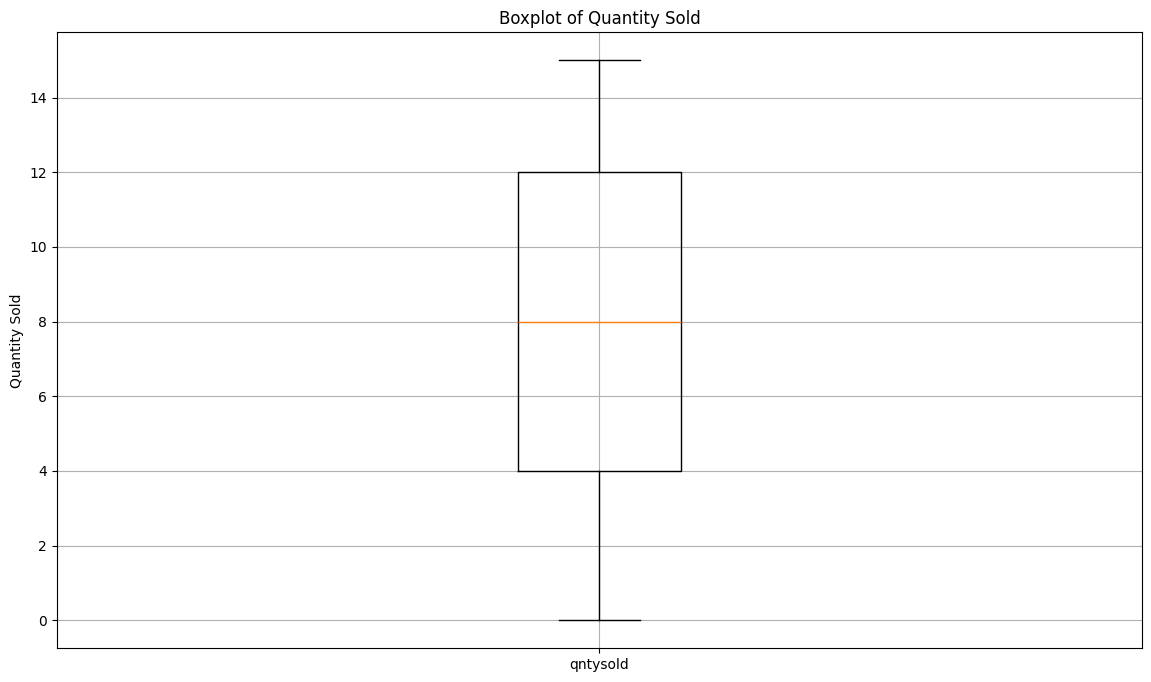

In [114]:
min_val = df["qntysold"].min()
max_val = df["qntysold"].max()

# Create the boxplot
plt.figure(figsize=(14, 8))
plt.boxplot([min_val, Q1, M, Q3, max_val], showfliers=False, tick_labels=['qntysold'])
plt.title('Boxplot of Quantity Sold')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

Jaccard & Cosine Similarity

In [110]:
def read_words(path):
    with open(path, 'r') as f:
        file_contents = f.read()
        lowercase_contents = file_contents.lower()
        words = lowercase_contents.split()
        return words

words1 = read_words(paper1_path)
words2 = read_words(paper2_path)

set1 = set(words1)
set2 = set(words2)

intersection = set1 & set2
union = set1 | set2
jaccard_score = len(intersection) / len(union)
print("Jaccard Coefficient:", jaccard_score)

vocab = list(set(words1 + words2))
vec1 = [words1.count(word) for word in vocab]
vec2 = [words2.count(word) for word in vocab]

dot_product = sum([vec1[i] * vec2[i] for i in range(len(vocab))])
magnitude1 = math.sqrt(sum([val**2 for val in vec1]))
magnitude2 = math.sqrt(sum([val**2 for val in vec2]))

if magnitude1 == 0 or magnitude2 == 0:
    cosine_similarity = 0
else:
    cosine_similarity = dot_product / (magnitude1 * magnitude2)
print("Cosine Similarity:", cosine_similarity)

Jaccard Coefficient: 0.8864628820960698
Cosine Similarity: 0.8522845800149151
